In [55]:
#In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#Question:What will be predicted score if a student study for 9.25 hrs in a day? 

In [27]:
#Import the libraries which are required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

In [58]:
#Now we will read the data from the given link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print('Imported Data Successfully')

Imported Data Successfully


In [57]:
#View the data upto to 10 rows
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [14]:
# Now we can use Describe function to see the mean, standard values, min values and many more.
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [24]:
#Check whether there is any null value in data so that we can remove it.
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


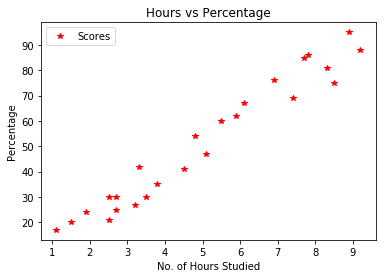

In [59]:

#Now we will plot distribution of scores on 2D graph.

data.plot(x='Hours', y='Scores', style='*r')
plt.title('Hours vs Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage')
plt.show()


Text(0,0.5,'Scores')

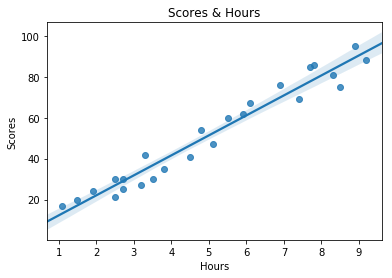

In [31]:

#In this graph we will show the relationship between No. of hours student studied vs Scores.

sb.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Scores & Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [32]:
# FROM ABOVE GRAPH WE CAN CLEARLY SEE THERE IS A POSITIVE LINEAR REGRESSION.
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [34]:

#NOW WE WILL DIVIDE THE DATA INTO ATTRIBUTES AND LABELS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
#NOW IT'S TIME TO TRAIN THE ALGORITHM

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Completed")

Training Completed


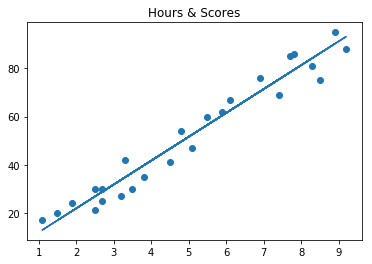

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title("Hours & Scores")
plt.plot(X, line);
plt.show()

In [46]:
print(regressor.intercept_)

2.018160041434683


In [47]:
print(regressor.coef_)

[9.91065648]


In [48]:
y_pred = regressor.predict(X_test)

In [61]:
# NOW WE WILL COMPARE ACTUAL VS PREDICTED 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [62]:

# NOW WILL PUT HOURS WHICh IS GIVEN IN THE QUESTION OR WE CAN PUT OUR OWN DATA.

hours =  [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Prediction of Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Prediction of Score = 93.6917324874


In [52]:

#NOW FINAL STAP IS EVALUATING THE MODEL

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 4.183859899002975)
('Mean Squared Error:', 21.5987693072174)
('Root Mean Squared Error:', 4.6474476121003665)
